### Load parameters

In [1]:
data_main = r'C:\Users\Valued Customer\Desktop\ClinicalData\Patient4' # data_main is patient level
global N_shrink,N_frame
N_shrink=N_frame = 5

### Load Packages

In [2]:
from PIL import Image
from skimage.util import img_as_float
from skimage import data as dt
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import glob, os.path
import matplotlib.image as mpimg

### Define motion image function

In [3]:
def plot_motion(imagePath):
    ### Load images
    ### Set directory to image file location
    os.chdir(imagePath)  

    shrink = (slice(0, None, N_shrink), slice(0, None, N_shrink)) # down sample by 10

    file_names=glob.glob('*F855*')[0:400] # load 400 PPG images
    #dt.load(imagePath+r'\\'+file_names[0])
    F=[img_as_float(dt.load(imagePath+r'\\'+im_name))[shrink] for im_name in file_names ]

    N_row=F[1].shape[0] # number of rows
    N_col=F[1].shape[1]
    F=np.array(F) # convert from list to 3D image array (400, 209, 282)

    ### Check pixel value range
    data=np.array(F)
    #_=plt.hist(data.flatten())
    ran=data.max()-data.min() # range of data

    ### Calculate frame difference
    #### 5 frames apart
    Diff=[]
    counter=0
    for i in range(0,400-N_frame,N_frame):
        Diff.append(abs(np.array(F[i+N_frame-1]-F[i])).sum())

    # normalize diff by number of pixels per frame
    Diff=np.array(Diff)/N_row/N_col/ran

    plt.plot(range(len(Diff)),Diff)
    #plt.show()
    plt.savefig(imagePath+'\motion.png',bbox_inches='tight')

### Find all images

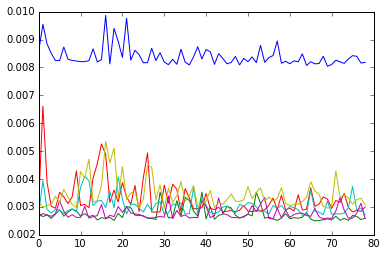

In [4]:
filesDepth = glob.glob(data_main+'\*\*\*\*')
dirsDepth = filter(lambda f: os.path.isdir(f), filesDepth)
for im in dirsDepth:
    plot_motion(im)